In [4]:
import json

In [93]:
with open("question.json", "r", encoding="utf-8") as f:
    data = json.load(f)

filtered_data = [item for item in data if item["collection_name"] is not None]

questions = [item["question"] for item in filtered_data]
labels = [item["collection_name"] for item in filtered_data]

In [36]:
with open("question.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    
# Filter data yang memiliki collection_name
filtered_data = [item for item in data if item["collection_name"] is not None]

# Jika collection_name == "perkuliahan", potong menjadi 20 data
perkuliahan_data = [item for item in filtered_data if item["collection_name"] == "perkuliahan"]
non_perkuliahan_data = [item for item in filtered_data if item["collection_name"] != "perkuliahan"]

# Batasi hanya 20 item dari perkuliahan
perkuliahan_data = perkuliahan_data[:30]

# Gabungkan kembali data
final_data = perkuliahan_data + non_perkuliahan_data

# Ambil pertanyaan dan label
questions = [item["question"] for item in final_data]
labels = [item["collection_name"] for item in final_data]

In [10]:
%pip install sentence-transformers scikit-learn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'f:\project\chatbot-ta\chatbot-service\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [50]:
from sentence_transformers import SentenceTransformer, models
import numpy as np
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
from collections import Counter

In [94]:
print("Distribusi label lengkap:", Counter(labels))

Distribusi label lengkap: Counter({'perkuliahan': 46, 'akademik': 18, 'tentang-kami': 17, 'umum': 10, 'tugas-akhir': 10, 'ara': 9, 'pengumuman': 9})


In [95]:
model = SentenceTransformer('../data/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
X = model.encode(questions)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.3, random_state=42, stratify=labels
)

In [97]:
print("Distribusi label di training data:", Counter(y_train))
print("Distribusi label di test data:", Counter(y_test))

Distribusi label di training data: Counter({'perkuliahan': 32, 'akademik': 13, 'tentang-kami': 12, 'umum': 7, 'tugas-akhir': 7, 'ara': 6, 'pengumuman': 6})
Distribusi label di test data: Counter({'perkuliahan': 14, 'akademik': 5, 'tentang-kami': 5, 'umum': 3, 'ara': 3, 'pengumuman': 3, 'tugas-akhir': 3})


In [98]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [99]:
print("Evaluasi model:")
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Evaluasi model:
              precision    recall  f1-score   support

    akademik       0.57      0.80      0.67         5
         ara       1.00      0.67      0.80         3
  pengumuman       1.00      0.33      0.50         3
 perkuliahan       0.86      0.86      0.86        14
tentang-kami       0.62      1.00      0.77         5
 tugas-akhir       1.00      0.67      0.80         3
        umum       1.00      0.67      0.80         3

    accuracy                           0.78        36
   macro avg       0.86      0.71      0.74        36
weighted avg       0.83      0.78      0.77        36



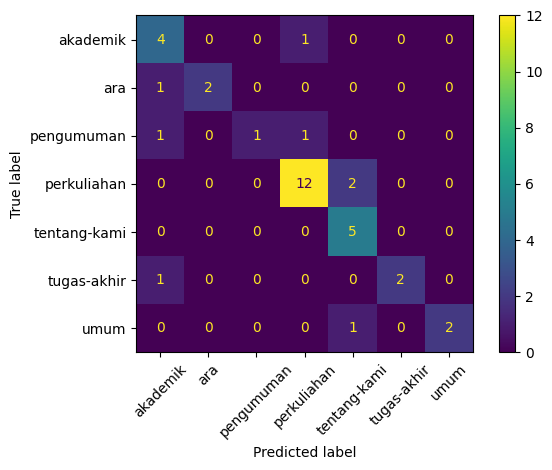

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()